# Part 2: Taylor Series Approximation

Taylor series are a powerful tool to approximate functions.
Throughout this week’s chapter in the text book, you have seen how Taylor series can be used to derive numerical approximations for derivatives and estimate the errors of numerical integration and differentiation techniques.

In the following exercises, we will have a closer look at how this approximation works.
The visualizations you create will hopefully help you to build some intuition for the meaning of a Taylor series.

We will approximate the natural logarithm by a number of Taylor polynomials of increasing order.

## Analytical Expression

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.1**

This is a pen-and-paper exercise. Write down the terms first four terms of the Taylor series for $f(x) = \ln(x)$ around $x_0=1$.

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

**Solution 2.1**

The first four derivatives of $f(x) = \ln(x)$ are:
$$f^\prime(x) = \frac{1}{x}$$
$$f^{\prime\prime}(x) = -\frac{1}{x^2}$$
$$f^{\prime\prime\prime}(x) = \frac{2}{x^3}$$
$$f^{\prime\prime\prime\prime}(x) = -\frac{6}{x^4}$$

In general,the $n$ th derivative is:
$$f^{(n)}(x) = (-1)^{n+1} (n-1)! \,x^{-n}$$

If we evaluate the derivative at $x_0=1$, we obtain:

$$f^\prime(1) = 1$$
$$f^{\prime\prime}(1) = -1$$
$$f^{\prime\prime\prime}(1) = 2$$
$$f^{\prime\prime\prime\prime}(1) = -6$$

The first four terms of the Taylor series around $x_0=1$ are:

$$
\begin{aligned}
f(x) &=  f(x_0) + (x-x_0)f'(x_0)+\frac{(x-x_0)^2}{2!}f''(x_0)+ \frac{(x-x_0)^3}{3!} f'''(x_0)+ \frac{(x-x_0)^4}{4!} f''''(x_0)+ ...\\
&= 0 + (x-1) \cdot 1 + \frac{(x-1)^2}{2!}\cdot (-1) + \frac{(x-1)^3}{3!}\cdot 2 + \frac{(x-1)^4}{4!}\cdot (-6) + \dots\\
&= (x-1) - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \dots
\end{aligned}
$$

</p>
</div>

## Plotting the Taylor Polynomials

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.2**

Before continuing with the Taylor series approximations, plot the expression $f(x)=\ln(x)$ in the interval $[0, 3]$. This will be used as benchmark to assess your approximations. We will want to produce plots that will include each successive term of the Taylor approximation to see how the approximation improves as we include more terms in the Taylor series.

</p>
</div>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_2374/107559143.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


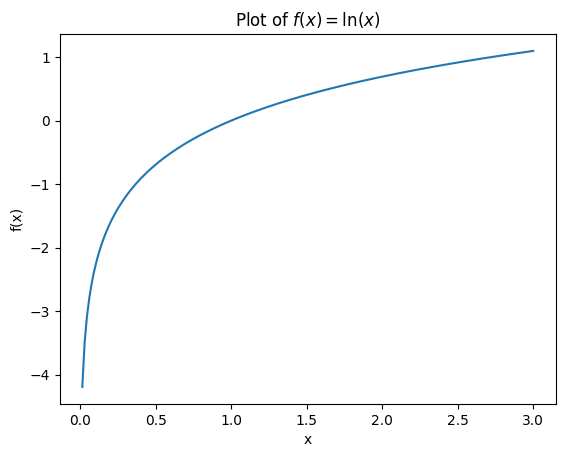

In [2]:
x = np.linspace(0, 3, num=200)

def f(x):
    return np.log(x)

plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Plot of $f(x) = \\ln(x)$");

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.3**

Implement a Python function that evaluates the nth derivative of $\ln(x)$ (at least up to $n=4$), so we can use it to compute the Taylor polynomial.
Complete the function template in the code cell below.

Tip: to compute the factorial, you can use the function `math.factorial` from the Python standard library.

</p>
</div>

In [3]:
def fn(x, n):
    """Compute the nth derivative of ln(x) at point x"""
    return (-1)**(n+1) * math.factorial(n-1) * x**(-n)

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.4**

Define the expansion point $x_0$ in Python and provide Python expressions for the Taylor polynomials of first, second, third and fourth order.

</p>
</div>

In [4]:
x0 = 1
taylor_1 = f(x0) + fn(x0, 1) * (x - x0)
taylor_2 = taylor_1 + fn(x0, 2) * (x - x0) ** 2 / math.factorial(2)
taylor_3 = taylor_2 + fn(x0, 3) * (x - x0) ** 3 / math.factorial(3)
taylor_4 = taylor_3 + fn(x0, 4) * (x - x0) ** 4 / math.factorial(4)

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.5**

Fill in the code below to plot the function $f(x)$ along with the Taylor polynomials of increasing order.

</p>
</div>

/tmp/ipykernel_2374/107559143.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


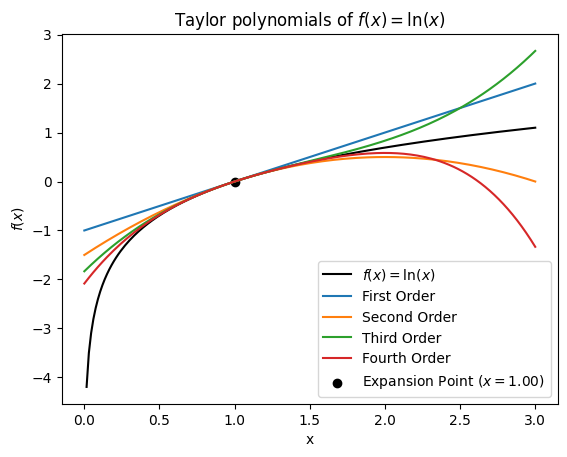

In [5]:
# Plot f(x) and the Taylor polynomials
plt.plot(x, f(x), label="$f(x) = \\ln(x)$", color="k")
plt.plot(x, taylor_1, label="First Order", color="C0")
plt.plot(x, taylor_2, label="Second Order", color="C1")
plt.plot(x, taylor_3, label="Third Order", color="C2")
plt.plot(x, taylor_4, label="Fourth Order", color="C3")

# Plot the expansion point x0 as a dot
plt.scatter(
    [x0], [f(x0)], color="k", marker="o", label=f"Expansion Point ($x = {x0:0.2f}$)"
)

# Add labels to the plot
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("Taylor polynomials of $f(x) = \\ln(x)$")
plt.legend()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.6**

Look at the plot you just created. Which Taylor polynomial approximates the function $f(x)$ the best? How does depend on the distance from the expansion point $x_0$? You can use your findings to help answer question 2.3 in the report.

</p>
</div>


## Absolute error

To further analyze the error introduced by truncating the Taylor series, we can evaluate the absolute difference between the function $f(x)$ and the Taylor polynomials:

$$\text{error} =|f(x)-T_n|\,$$

where $T_n$ refers to the Taylor polynomial of $n$th order.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.7**

Use your Taylor series approximations and the analytic expression for $f(x)$ to determine the absolute error. Plot the error against $x$ and vary the $x$- and $y$-limits. Are the larger order Taylor polynomials always more accurate? You can use your findings to help answer question 2.3 in the report.

</p>
</div>

/tmp/ipykernel_2374/107559143.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


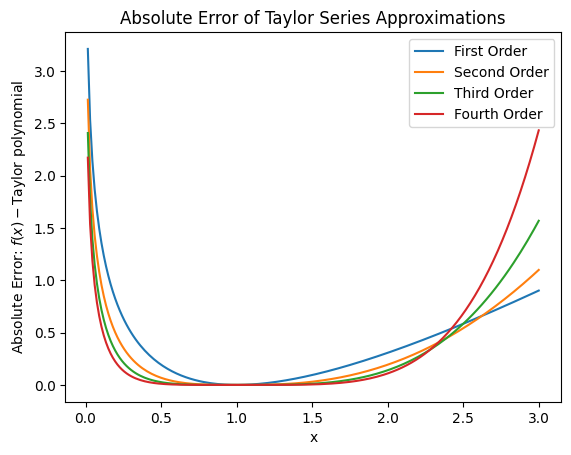

In [6]:
# Compute the absolute error
error_1 = np.abs(f(x) - taylor_1)
error_2 = np.abs(f(x) - taylor_2)
error_3 = np.abs(f(x) - taylor_3)
error_4 = np.abs(f(x) - taylor_4)

# Plot the absolute error against x
plt.plot(x, error_1, label="First Order", color="C0")
plt.plot(x, error_2, label="Second Order", color="C1")
plt.plot(x, error_3, label="Third Order", color="C2")
plt.plot(x, error_4, label="Fourth Order", color="C3")

# Add labels
plt.xlabel("x")
plt.ylabel("Absolute Error: $f(x)-\\mathrm{Taylor~polynomial}$")
plt.title("Absolute Error of Taylor Series Approximations")
plt.legend()

> By Anna Störiko, Ronald Brinkgreve, Justin Pittman, Jaime Arriaga Garcia, Robert Lanzafame, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html)